## Importing Libraries and the data

In [73]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [74]:
path = r"C:\Users\17635\Downloads\DATASET 2.CSV"
dataset = pd.read_csv(path)
dataset = pd.DataFrame(dataset)
dataset.head()

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,1,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


## Data Preprocessing

In [75]:
dataset = dataset.drop('id',axis =1)

In [76]:
dataset.info()
print(dataset.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Duration in months                                        1000 non-null   int64 
 1   Credit history                                            1000 non-null   object
 2   Purpose of the credit                                     1000 non-null   object
 3   Credit amount                                             1000 non-null   int64 
 4   Status of savings account/bonds                           1000 non-null   object
 5   Present employment(years)                                 1000 non-null   object
 6   Installment rate in percentage of disposable income       1000 non-null   int64 
 7   personal_status                                           1000 non-null   object
 8   Other debtors / guarantors   

In [77]:
#quick idea on the continous features
dataset.describe()

,Duration in months,Credit amount,Installment rate in percentage of disposable income,Present residence since X years,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [78]:
#Looking unique values(categorical)
print(dataset.nunique())

Duration in months                                           33
Credit history                                                5
Purpose of the credit                                        10
Credit amount                                               921
Status of savings account/bonds                               5
Present employment(years)                                     5
Installment rate in percentage of disposable income           4
personal_status                                               4
Other debtors / guarantors                                    3
Present residence since X years                               4
Property                                                      4
Age in years                                                 53
Other installment plans (banks/stores)                        3
Housing                                                       3
Number of existing credits at this bank                       4
Job                                     

In [79]:
#check for missing values
print(dataset.isnull().sum())

Duration in months                                          0
Credit history                                              0
Purpose of the credit                                       0
Credit amount                                               0
Status of savings account/bonds                             0
Present employment(years)                                   0
Installment rate in percentage of disposable income         0
personal_status                                             0
Other debtors / guarantors                                  0
Present residence since X years                             0
Property                                                    0
Age in years                                                0
Other installment plans (banks/stores)                      0
Housing                                                     0
Number of existing credits at this bank                     0
Job                                                         0
Number o

In [80]:
# Splitting independent and dependent features
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


In [81]:
y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Status of existing checking account, Length: 1000, dtype: object

In [82]:
Target_var_class_counts = dataset['Status of existing checking account'].value_counts(normalize=True)*100
print(Target_var_class_counts)

good    70.0
bad     30.0
Name: Status of existing checking account, dtype: float64


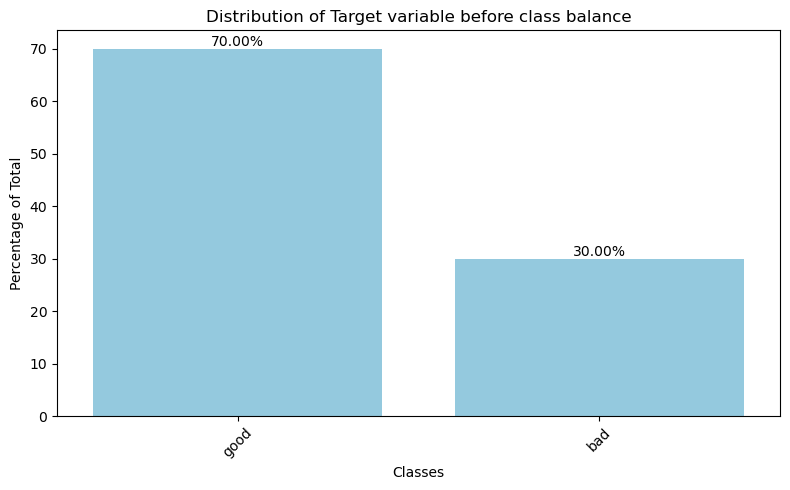

In [83]:
#Create Bar Plot to vissualize the classes
plt.figure(figsize=(8,5))
ax = sns.barplot(x=Target_var_class_counts.index, y=Target_var_class_counts.values, color = 'skyblue')

#add data labels on top of the bars
for index, value in enumerate(Target_var_class_counts.values):
    ax.text(x=index, y=value, s=f'{value:.2f}%', ha='center', va='bottom')  #place label at specified location
    
plt.title('Distribution of Target variable before class balance')
plt.xlabel('Classes')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**********************************************************************************************

##### Encoding Categorical data

In [84]:
# Convert categorical features into numerical using LabelEncoder
label_encoders = {}
for column in x.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    x[column] = label_encoders[column].fit_transform(x[column])

In [85]:
x.head()

,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,Present residence since X years,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker
0,6,1,6,1169,4,3,4,3,2,4,3,67,1,1,2,1,1,1,1
1,48,3,6,5951,2,0,2,0,2,2,3,22,1,1,1,1,1,0,1
2,12,1,2,2096,2,1,2,3,2,3,3,49,1,1,1,3,2,0,1
3,42,3,3,7882,2,1,2,3,1,4,1,45,1,0,1,1,2,0,1
4,24,2,4,4870,2,0,3,3,2,4,2,53,1,0,2,1,2,0,1


In [86]:
#Encoding : 1D Array (Dependent variable)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y=le.fit_transform(y)

In [87]:
print(y)
print(y.shape)
print(x.shape)

[1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 

****************************************************************************************

##### Pearson Correlation Analysis

In [88]:
# Merging x and y back together
# Ensure y is a DataFrame or Series
y = pd.Series(y, name=dataset.columns[-1])  # Adding name for column label

# Merging x and y back together
df_merged = pd.concat([x, y], axis=1)
df_merged.head()

,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,Present residence since X years,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,6,1,6,1169,4,3,4,3,2,4,3,67,1,1,2,1,1,1,1,1
1,48,3,6,5951,2,0,2,0,2,2,3,22,1,1,1,1,1,0,1,0
2,12,1,2,2096,2,1,2,3,2,3,3,49,1,1,1,3,2,0,1,1
3,42,3,3,7882,2,1,2,3,1,4,1,45,1,0,1,1,2,0,1,1
4,24,2,4,4870,2,0,3,3,2,4,2,53,1,0,2,1,2,0,1,0


In [89]:
df_merged.shape

(1000, 20)

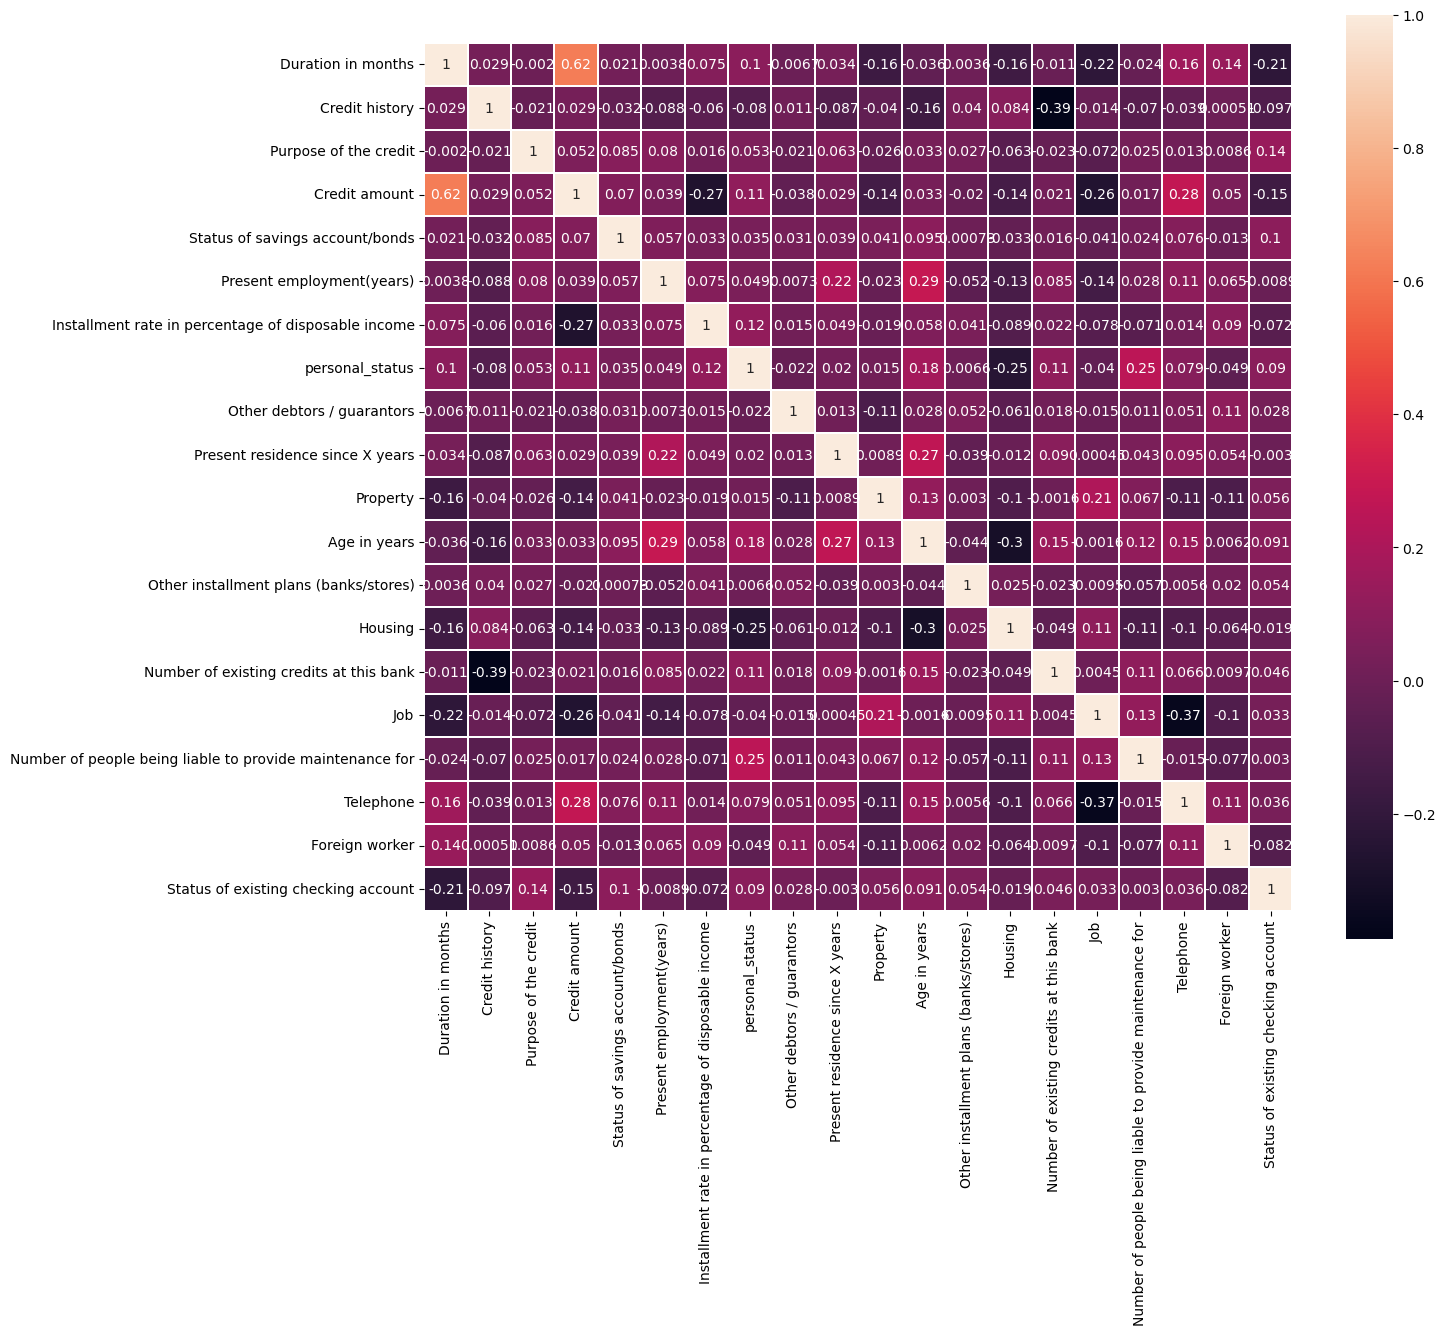

In [90]:
plt.figure(figsize=(14,12))
sns.heatmap(df_merged.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

The heatmap shows that the correlation between the features and the target variable is low and therefore we may need to perform Feature Engineering to tranform the feaures. The following are the considerations;
    * Perform EDA to vissualize distributions
    * Do a Feature Selection for only most important features
    * Principal component Analysis to reveal underlying structures in the data
    * Balance the class by undersampling the majority class or generating synthetic data for minority class.
    * Tuning Hyperparameters (Grid Serach CV)
    

##### Feature Selection (Based  on the Correlation Heatmap and Decision Tree)

In [91]:
 x = x.iloc[:, [3,1,11,0,2,10,5,6,7,9,12,13,15]]
 x.head()

,Credit amount,Credit history,Age in years,Duration in months,Purpose of the credit,Property,Present employment(years),Installment rate in percentage of disposable income,personal_status,Present residence since X years,Other installment plans (banks/stores),Housing,Job
0,1169,1,67,6,6,3,3,4,3,4,1,1,1
1,5951,3,22,48,6,3,0,2,0,2,1,1,1
2,2096,1,49,12,2,3,1,2,3,3,1,1,3
3,7882,3,45,42,3,1,1,2,3,4,1,0,1
4,4870,2,53,24,4,2,0,3,3,4,1,0,1


**********************************************

####  More EDA

#####  Explore Distribution of Variables

In [92]:
print(dataset.columns)


Index(['Duration in months', 'Credit history', 'Purpose of the credit',
       'Credit amount', 'Status of savings account/bonds',
       'Present employment(years)',
       'Installment rate in percentage of disposable income',
       'personal_status', 'Other debtors / guarantors',
       'Present residence since X years', 'Property', 'Age in years',
       'Other installment plans (banks/stores)', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'Foreign worker', 'Status of existing checking account'],
      dtype='object')


******************************************************************************************

## Model

##### Spliting the data into Training Sets

In [93]:
# Spliting the data into Training Sets

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 




###### Balancing the class After Train, test split (-Avoid data Leakage, -Preserving Real-World Distribution in the Test Set)

In [94]:
##********** WE NEED TO EXPERIMENT WITH DIFFERENT SAMPLING TECHNIQUES TILL WE FIND THE RIGHT ONE ********** 

# # Balancing the class After Train, test split (-Avoid data Leakage, -Preserving Real-World Distribution in the Test Set)
# from imblearn.under_sampling import NearMiss

# # Create an instance of NearMiss
# nm = NearMiss()

# X_train, y_train = nm.fit_resample(X_train, y_train)

# print(X_train.shape, y_train.shape)


# plt.figure(figsize=(6,4))
# sns.countplot(x=y_train, width = 0.4, color = 'blue')
# plt.title('Distribution of Target variable after class balance')
# plt.xlabel('class')

# plt.tight_layout()
# plt.show()
# Apply Random Oversampling
#ros = RandomOverSampler(random_state=42)
#X_train, y_train = ros.fit_resample(X_train, y_train)

# Train a model on the resampled dataset
#model = RandomForestClassifier(random_state=42)
#model.fit(X_train, y_train)



#over = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% minority class
#under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Reduce majority class to 80%
#pipeline = Pipeline(steps=[('o', over), ('u', under)])

#X_train, y_train = pipeline.fit_resample(X_train, y_train)

#from imblearn.over_sampling import ADASYN

#adasyn = ADASYN(random_state=42)
#X_train, y_train = adasyn.fit_resample(X_train, y_train)


###### Feature Scaling (Standardization)

In [95]:
# Standardize the features (this helps with gradient descent convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*******************************************************************************************

##### Logistic Regression

Accuracy: 0.62


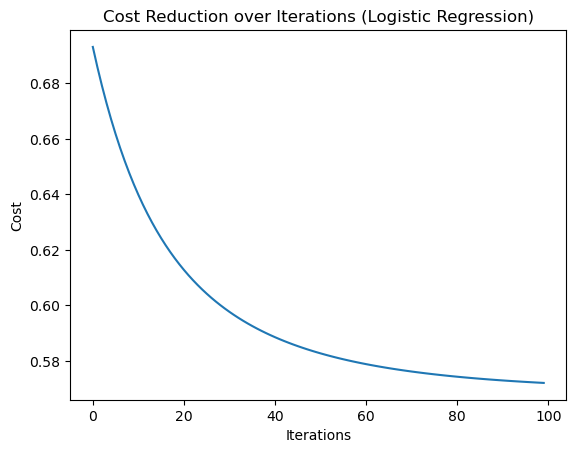

In [96]:
import numpy as np

def logistic_regression(x, y, learning_rate=0.01, iterations=100):
    # Convert y to a NumPy array and reshape it
    y = np.array(y).reshape(-1, 1)
    
    # Add intercept term to X (bias term)
    n, d = x.shape
    x = np.c_[np.ones(n), x]  # Adds a column of ones to x for the intercept
    theta = np.zeros((d + 1, 1))
    cost_history = []

    # Gradient descent
    for _ in range(iterations):
        # Predict and calculate the gradient
        h = 1 / (1 + np.exp(-x @ theta))
        gradient = (x.T @ (h - y)) / n
        theta -= learning_rate * gradient
        
        # Calculate the cost and store it
        cost = (-1 / n) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_history.append(cost)

    return theta, cost_history

# Example function to test the dataset with plotting
def test_dataset(X_train, X_test, y_train, y_test):
    # Run the gradient descent
    theta, cost_history = logistic_regression(X_train, y_train, learning_rate=0.1, iterations=100)
    
    # Add column of ones for bias
    X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
    predictions = 1 / (1 + np.exp(-X_test_with_bias @ theta))  # Sigmoid function for predictions

    # Convert probabilities to binary predictions
    binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]

    # Calculate accuracy
    accuracy = accuracy_score(y_test, binary_predictions)

    # Print accuracy
    print("Accuracy:", accuracy)
   
    # Plot the cost history
    import matplotlib.pyplot as plt
    plt.plot(cost_history)
    plt.title('Cost Reduction over Iterations (Logistic Regression)')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()


test_dataset(X_train, X_test, y_train, y_test) 


********************************************************************************************

##### Checking the Results with SGD Classifier


In [97]:
from sklearn.linear_model import SGDClassifier

log_reg = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.1,tol=0, penalty=None, max_iter=100)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5366666666666666


*******************************************************************************

#### Non Linear SVM Model

Default RBF Kernel is used

Initial SVM Model Performance:


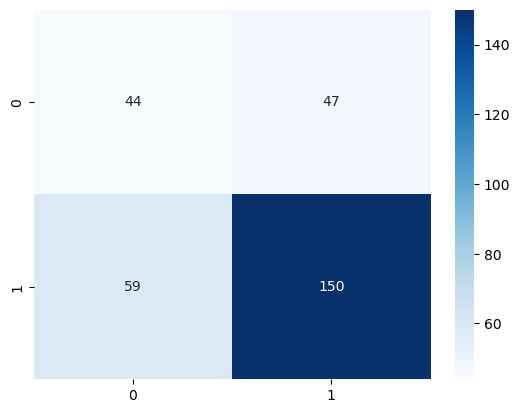

In [46]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Initial SVM Model Performance:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [47]:
# Check the classification report for the unscaled data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.48      0.45        91
           1       0.76      0.72      0.74       209

    accuracy                           0.65       300
   macro avg       0.59      0.60      0.60       300
weighted avg       0.66      0.65      0.65       300



##### Vissualizing The Decision Boundary

In [999]:
# Import necessary libraries for PCA and visualization
from sklearn.decomposition import PCA
import numpy as np

# Reducing the features to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Model
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)

SVC()

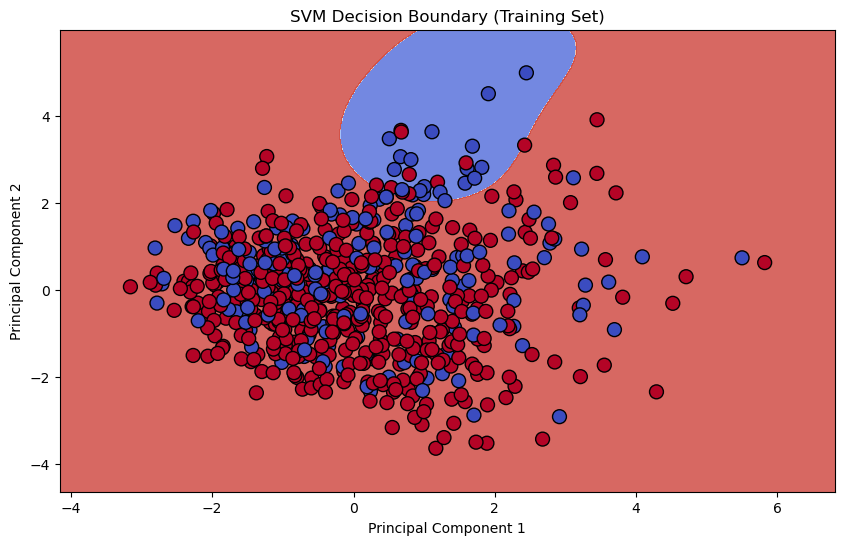

In [1001]:
# Plotting the decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predicting the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Visualizing the decision boundary for the training set
plot_decision_boundary(X_train_pca, y_train, svm_pca, 'SVM Decision Boundary (Training Set)')

##### Effects of the Hyperparameter on the Decision Boundary

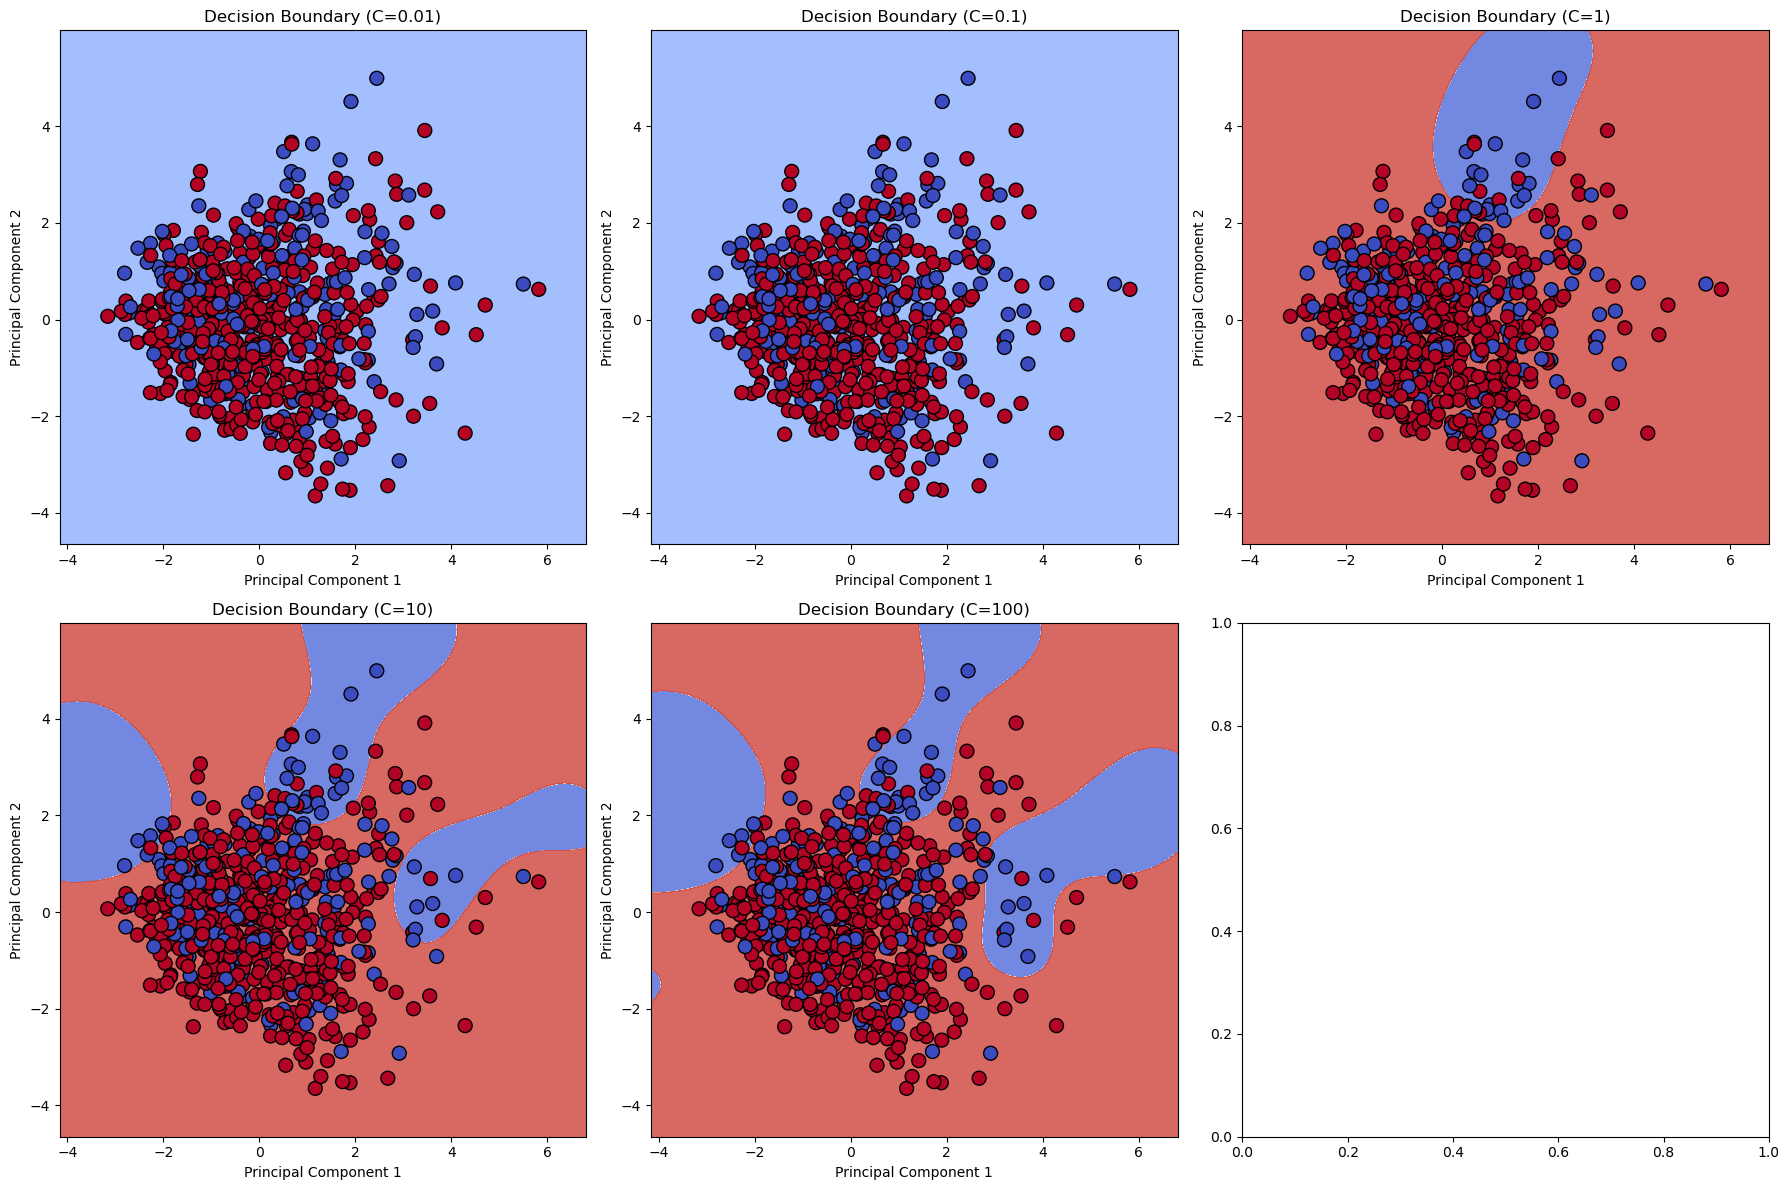

In [1003]:
# C values commonly used in SVM
C_values = [0.01, 0.1, 1, 10, 100]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# Flatten the 2D axes array to 1D for easier indexing
axes = axes.ravel()

# Loop through each C value and plot the decision boundary
for i, C in enumerate(C_values):
    # Train the SVM model with the current C value on PCA-reduced data
    svm_pca = SVC(kernel='rbf', C=C, gamma='scale')
    svm_pca.fit(X_train_pca, y_train)

    # Generate the decision boundary for the training set
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predicting the class for each point in the meshgrid
    Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary on the current subplot
    axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    axes[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
    axes[i].set_title(f'Decision Boundary (C={C})')
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the grid of figures
plt.show()

#### SVM with Different Kernels

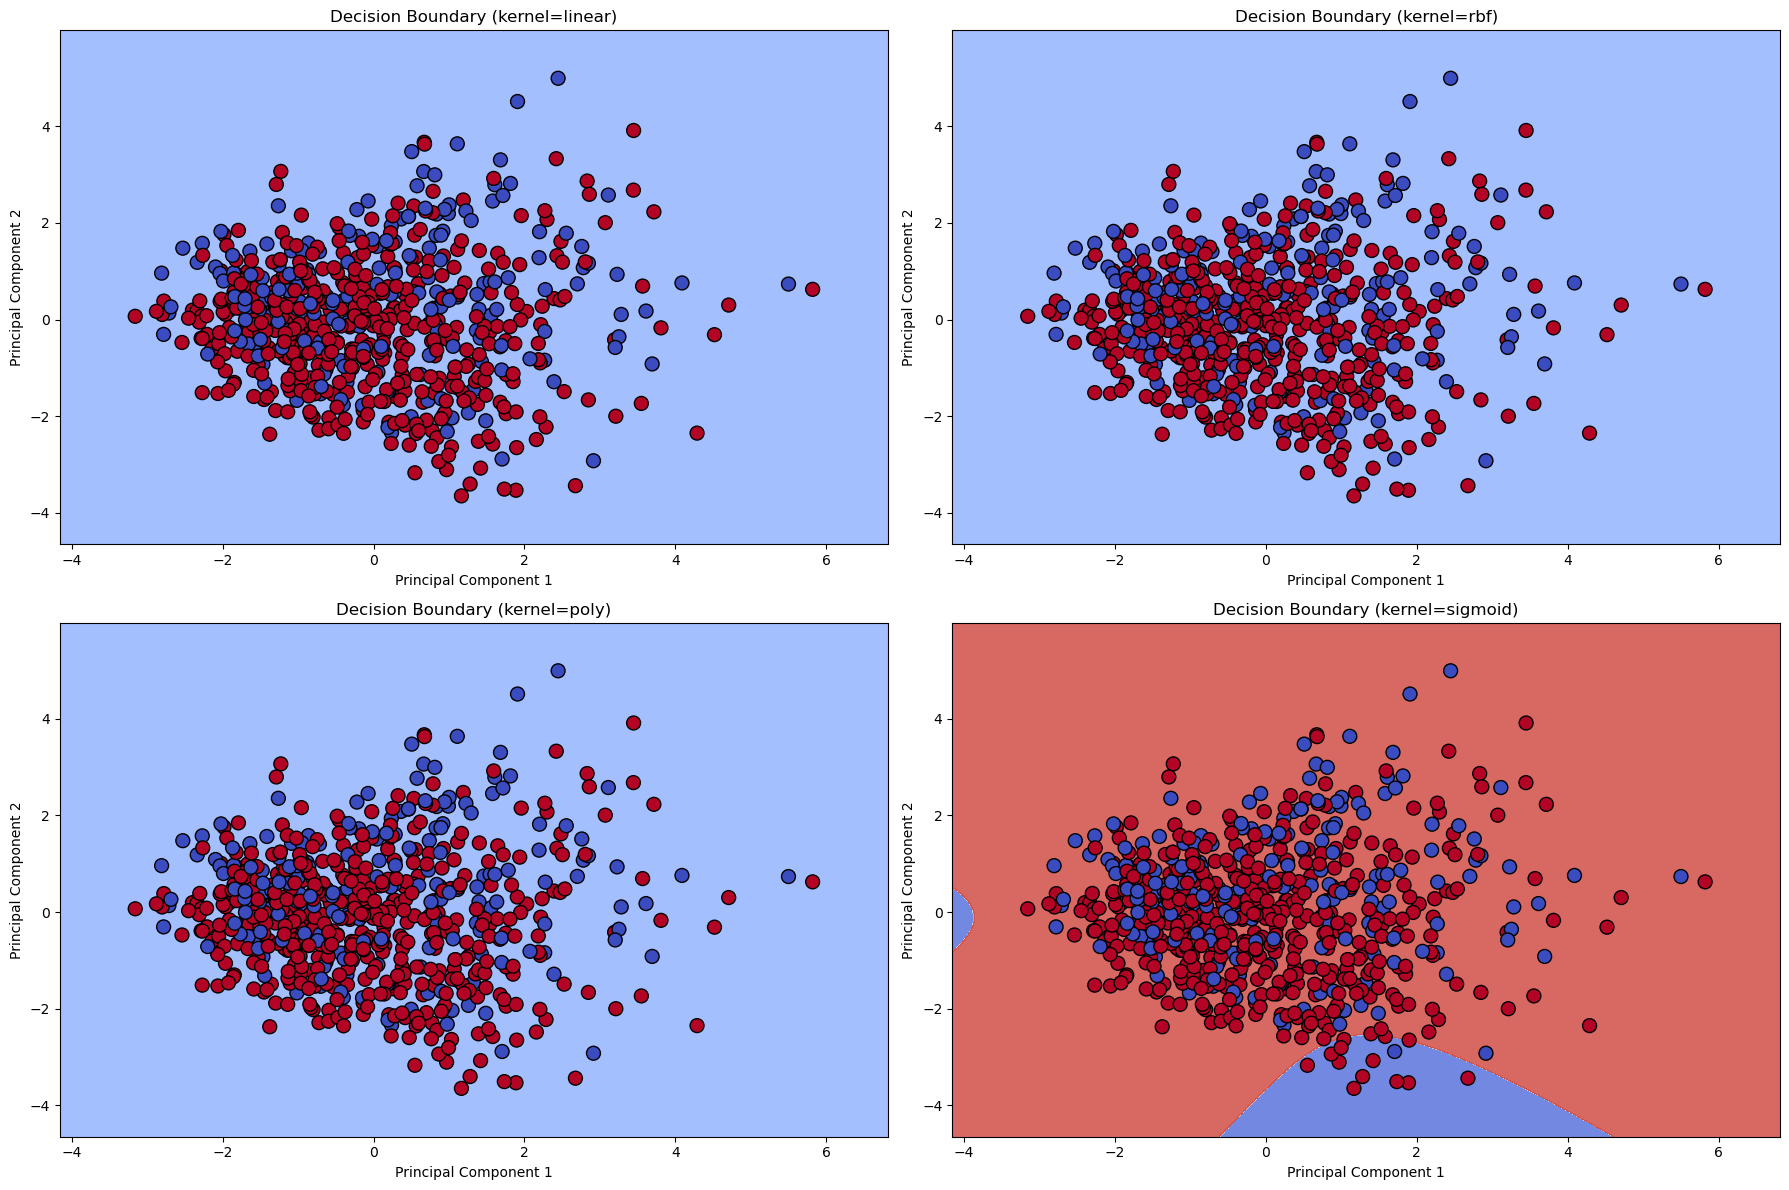

In [1005]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
# Flatten the 2D axes array to 1D for easier indexing
axes = axes.ravel()

# Loop through each k value and plot the decision boundary
for i, k in enumerate(kernel):
    # Train the SVM model with the current k value on PCA-reduced data
    svm_pca = SVC(kernel= k, C = 0.1, gamma='scale')
    svm_pca.fit(X_train_pca, y_train)

    # Generate the decision boundary for the training set
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predicting the class for each point in the meshgrid
    Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary on the current subplot
    axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    axes[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
    axes[i].set_title(f'Decision Boundary (kernel={k})')
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the grid of figures
plt.show()

##### Effect of Gamma for rbf kernel


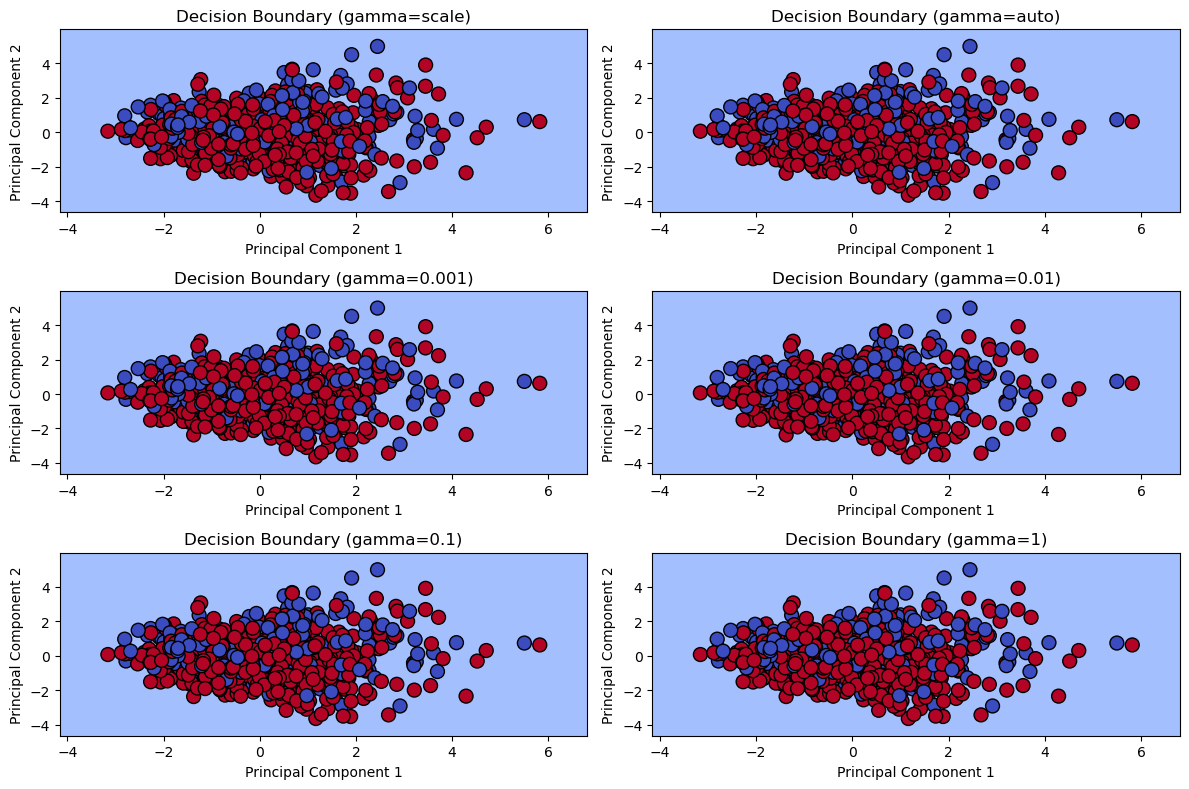

In [1007]:
gamma = ['scale', 'auto', 0.001, 0.01, 0.1, 1]

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
# Flatten the 2D axes array to 1D for easier indexing
axes = axes.ravel()

# Loop through each gamma value and plot the decision boundary
for i, g in enumerate(gamma):
    # Train the SVM model with the current C value on PCA-reduced data
    svm_pca = SVC(kernel= 'rbf', C = 0.1, gamma=g)
    svm_pca.fit(X_train_pca, y_train)

    # Generate the decision boundary for the training set
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predicting the class for each point in the meshgrid
    Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary on the current subplot
    axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    axes[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
    axes[i].set_title(f'Decision Boundary (gamma={g})')
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the grid of figures
plt.show()

*****************************************************************************************

#### Tuning The Hyperparameter of the Model

In [1011]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

Tuned SVM Model Performance:
[[ 18  73]
 [ 15 194]]
              precision    recall  f1-score   support

           0       0.55      0.20      0.29        91
           1       0.73      0.93      0.82       209

    accuracy                           0.71       300
   macro avg       0.64      0.56      0.55       300
weighted avg       0.67      0.71      0.66       300



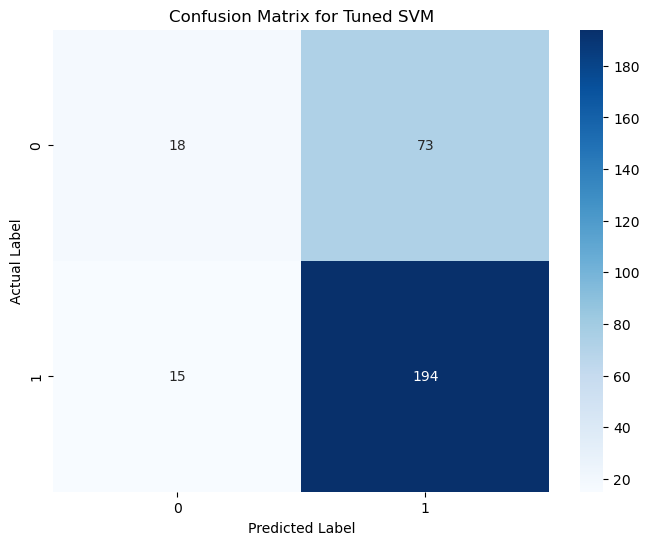

In [1012]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 3: Evaluate the tuned model
tuned_svm = grid_search.best_estimator_
y_pred_tuned = tuned_svm.predict(X_test)

print("\nTuned SVM Model Performance:")
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned SVM')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

*************************************************************************************************

****************************************************************************************

#### To View Innitial Feature Selection Ranking First uncomment the Feature Selecetion cell above.

********************************************************************************************

#### Aide in Feature Selection

### Decision Tree

In [1024]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

In [1025]:
#Plotting the decision tree structure
from sklearn.tree import export_graphviz

feature_names = x.columns[:] 
class_names = ['Class 0', 'Class 1'] 

# Export the tree to a .dot file
export_graphviz(tree_clf,
                out_file='./C_Risk_tree.dot',
                feature_names=feature_names,
                class_names=class_names,
                rounded=True,
                filled=True)

In [1026]:
! dot -Tpng "./C_Risk_tree.dot" -o "./C_Risk_tree.png"

'dot' is not recognized as an internal or external command,
operable program or batch file.


##### Tuning Hyper Parameters

In [1028]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##### Creating Different Tree with different Hyperparametrs

In [1030]:
# Define the parameter grid for regularization
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier(random_state=42)

In [1031]:
# Use GridSearchCV to search for the best combination of parameters
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")

# Optional: Display feature importances
importances = best_model.feature_importances_
features = feature_names
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print("\nFeature Importances:")
print(importance_df.sort_values(by='Importance', ascending=False))

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}
Best cross-validation accuracy: 0.6643
Test set accuracy with best parameters: 0.7067

Feature Importances:
                                              Feature  Importance
0                                       Credit amount    0.209048
3                                  Duration in months    0.177432
1                                      Credit history    0.173594
4                               Purpose of the credit    0.106783
2                                        Age in years    0.096731
5                                            Property    0.067330
10             Other installment plans (banks/stores)    0.036786
6                           Present employment(years)    0.035058
8                                     personal_status    0.028072
12                                                Job    0.021542
11                                            Housing    0.020531
7   Install